# Telecom Churn Prediction
<br>
<font color = blue>
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist,  task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data. 
</font>
</br>

<br>The solution is divided into the following sections:

- Data Understanding, Preparation, and Pre-Processing
- Exploratory Data Analysis 
- Feature Engineering and Variable Transformation
- Model Selection, Model Building, and  Prediction 

### 1.Data Understanding, Preparation, and Pre-Processing

Let's first have a look at the dataset and understand the size, attribute names etc.

In [384]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [385]:
# reading the train dataset

df_train = pd.read_csv("train.csv")
df_train.shape

(69999, 172)

There are 69999 rows and 172 columns.

In [386]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

This shows that there are many null values present.

In [387]:
# reading the test dataset

df_test = pd.read_csv("test.csv")
df_test.shape

(30000, 171)

There are 30000 rows and 171 columns.

In [388]:
df_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

We can see that no of columns in test data is 1 less than no of columns in train dataset. Lets find out which one is that.

In [389]:
df_train.columns.symmetric_difference(df_test.columns)

Index(['churn_probability'], dtype='object')

Since churn probability is missing from the test dataset, we cannot merge these two dataframes.
<br> Hence we will use train data here.

In [390]:
# let's look at the statistical aspects of the dataframe

df_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [391]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

We can see that there are :
- many fields related to date which are of data type object
- many fileds related to recharge
- few columns have month as number appended at the end, while few have name prefixed.
- there is a `id` and `circle_id` columns
- `churn_probability` is the target variable

### Data Cleaning

since we have some null values, let's now conduct some data cleaning steps. 

In [392]:
# duplicacy check

df_train["id"].is_unique

True

This means that no two Ids are same, hence we have all rows unique.

In [393]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df_train.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,249.52
count_rech_2g_6,249.52
night_pck_user_6,249.52
arpu_2g_6,249.52
date_of_last_rech_data_6,249.52
total_rech_data_6,249.52
av_rech_amt_data_6,249.52
max_rech_data_6,249.52
count_rech_3g_6,249.52
fb_user_6,249.52


In [394]:
og = df_train.copy()

In [395]:
# create list of coloumns for recharge (total,av,max)
zeroimpute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [396]:
# function to replace missing values in recharg coloumns with zero

df[zeroimpute] = df[zeroimpute].apply(lambda x: x.fillna(0))

In [397]:
# List the columns having more than 70% missing values
col_list_missing_70 = list(df_missing_columns.index[df_missing_columns['null'] > 70])
col_list_missing_70

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [398]:
# Delete the columns having more than 70% missing values
df_train = df_train.drop(col_list_missing_70, axis=1)

In [399]:
df_train.shape

(69999, 142)

In [400]:
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


# Deleting the date columns as the date columns are not required in our analysis

In [401]:
datecol=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
# Dropping date columns
df_train = df_train.drop(datecol, axis=1)

In [402]:
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [403]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

id                        0.0
arpu_6                    0.0
arpu_7                    0.0
arpu_8                    0.0
onnet_mou_6               0.0
onnet_mou_7               0.0
onnet_mou_8               0.0
offnet_mou_6              0.0
offnet_mou_7              0.0
offnet_mou_8              0.0
roam_ic_mou_6             0.0
roam_ic_mou_7             0.0
roam_ic_mou_8             0.0
roam_og_mou_6             0.0
roam_og_mou_7             0.0
roam_og_mou_8             0.0
loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8          0.0
loc_og_mou_6              0.0
loc_og_mou_7              0.0
loc_og_mou_8              0.0
std_og_t2t_mou_6          0.0
std_og_t2t_mou_7          0.0
std_og_t2t

In [404]:
## Drop circle_id column (as this is uniques value)
df_train = df_train.drop('circle_id', axis=1)

In [405]:
df_train.shape

(69999, 135)

# Find high-value customers

In [406]:
## Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
df_train['avg_rech_amt_6_7'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_7'])/2
X = df_train['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

In [407]:
df_train = df_train[df_train['avg_rech_amt_6_7'] >= X]
df_train.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0


Lets now check if there is any column which has same value in all rows.

In [408]:
same_value_columns = []
for col in df_train.columns:
    if df_train[col].nunique() == 1:
        same_value_columns.append(col)
        
print(same_value_columns)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Since these columns will not help in any model building, hence we can delete them.

In [409]:
df_train = df_train.drop( columns = same_value_columns)
df_train.shape

(21018, 127)

Now we have 126 columns.

Let us check the percentage of null values.

In [410]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
total_rech_data_7,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
last_day_rch_amt_6,0.0
last_day_rch_amt_7,0.0
last_day_rch_amt_8,0.0
total_rech_data_6,0.0
total_rech_data_8,0.0


Deleting date columns as these are not required in our dataset.

Next lets seperate the recharge related columns and look into the data.

In [411]:
recharge_columns = df_train.columns[df_train.columns.str.contains('rech')]
print(recharge_columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'avg_rech_amt_6_7'],
      dtype='object')


Now we can find out the percentage of null values in these columns.

In [412]:
recharge_missing_values = round(df_train.loc[:,recharge_columns].isnull().sum()/len(df_train)*100,2)
print(pd.DataFrame(recharge_missing_values))

                    0
total_rech_num_6  0.0
total_rech_num_7  0.0
total_rech_num_8  0.0
total_rech_amt_6  0.0
total_rech_amt_7  0.0
total_rech_amt_8  0.0
max_rech_amt_6    0.0
max_rech_amt_7    0.0
max_rech_amt_8    0.0
avg_rech_amt_6_7  0.0


Okay this shows the percentage of missing values. Next we can check the statistic of the same.

In [413]:
df_train.loc[:,recharge_columns].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,avg_rech_amt_6_7
count,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000
mean,12.141545,11.915311,10.214102,698.377581,693.237083,611.818965,170.896708,173.938434,162.027358,695.807332
std,9.443743,9.557695,9.436990,553.783597,570.732852,626.739014,176.736763,173.619380,167.498739,502.739093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,370.000000
25%,6.000000,6.000000,4.000000,431.000000,427.000000,307.000000,110.000000,110.000000,67.000000,450.000000
50%,9.000000,9.000000,8.000000,584.000000,581.000000,520.000000,120.000000,128.000000,130.000000,568.000000
75%,15.000000,15.000000,13.000000,838.000000,832.000000,786.000000,200.000000,200.000000,198.000000,795.000000
max,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,37762.500000


Here we can do 2 things :
- Impute missing values with 0 as it would denote that recharge amount for that month is 0.
- Derive new columns to find total recharge data, total recharge amount data, average recharge amount data

#### 1. Imputing NA with 0

In [370]:
#df_train['total_rech_num_6'] = df_train['total_rech_num_6'].replace(np.NaN,0.0)
#df_train['total_rech_num_7'] = df_train['total_rech_num_7'].replace(np.NaN,0.0)
#df_train['total_rech_num_8'] = df_train['total_rech_num_8'].replace(np.NaN,0.0)

In [371]:
#df_train['total_rech_amt_6'] = df_train['total_rech_amt_6'].replace(np.NaN,0.0)
#df_train['total_rech_amt_7'] = df_train['total_rech_amt_7'].replace(np.NaN,0.0)
#df_train['total_rech_amt_8'] = df_train['total_rech_amt_8'].replace(np.NaN,0.0)

In [372]:
#df_train['max_rech_amt_6'] = df_train['max_rech_amt_6'].replace(np.NaN,0.0)
#df_train['max_rech_amt_7'] = df_train['max_rech_amt_7'].replace(np.NaN,0.0)
#df_train['max_rech_amt_8'] = df_train['max_rech_amt_8'].replace(np.NaN,0.0)

In [373]:
#df_train['count_rech_2g_6'] = df_train['count_rech_2g_6'].replace(np.NaN,0.0)
#df_train['count_rech_2g_7'] = df_train['count_rech_2g_7'].replace(np.NaN,0.0)
#df_train['count_rech_2g_8'] = df_train['count_rech_2g_8'].replace(np.NaN,0.0)

In [374]:
#df_train['count_rech_3g_6'] = df_train['count_rech_3g_6'].replace(np.NaN,0.0)
#df_train['count_rech_3g_7'] = df_train['count_rech_3g_7'].replace(np.NaN,0.0)
#df_train['count_rech_3g_8'] = df_train['count_rech_3g_8'].replace(np.NaN,0.0)

In [414]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
total_rech_data_7,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
last_day_rch_amt_6,0.0
last_day_rch_amt_7,0.0
last_day_rch_amt_8,0.0
total_rech_data_6,0.0
total_rech_data_8,0.0


In [415]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

id                        0.0
arpu_6                    0.0
arpu_7                    0.0
arpu_8                    0.0
onnet_mou_6               0.0
onnet_mou_7               0.0
onnet_mou_8               0.0
offnet_mou_6              0.0
offnet_mou_7              0.0
offnet_mou_8              0.0
roam_ic_mou_6             0.0
roam_ic_mou_7             0.0
roam_ic_mou_8             0.0
roam_og_mou_6             0.0
roam_og_mou_7             0.0
roam_og_mou_8             0.0
loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8          0.0
loc_og_mou_6              0.0
loc_og_mou_7              0.0
loc_og_mou_8              0.0
std_og_t2t_mou_6          0.0
std_og_t2t_mou_7          0.0
std_og_t2t

In [416]:
df.columns[df.isnull().any()]

Index([], dtype='object')

# Checking and removing outlier

In [417]:
#find coloumns with datatype numerical
num_cols= df_train.select_dtypes(exclude=['object']).columns
num_cols

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability',
       'avg_rech_amt_6_7'],
      dtype='object', length=127)

In [418]:
# Removing outliers below 10th and above 90th percentile and assigning to new df
for col in num_cols: 
    q1 = df_train[col].quantile(0.10)
    q3 = df_train[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    df_filter = df_train.loc[(df[col] > range_low) & (df_train[col] < range_high)]

df_filter.shape

(16392, 127)

#### 2. Deriving new columns

We will derive below new variables on the filtered data
1. decrease_mou-> if there is increase/decrease in total mou(Minutes of usage  voice calls)
2. decrease_rech_amt-> if the increase/decreas in number of recharge
3. decrease_arpu-> if thereis increase/decreas in arpu
4. avg_rech_amt_action-> 

In [419]:
# Avg. mou ==> decrease_mou
# We are taking average because there are two months(7 and 8) in action phase
df_filter['avg_mou_action'] = (df_filter['total_og_mou_7'] + df_filter['total_og_mou_8'] + df_filter['total_ic_mou_7'] + df_filter['total_ic_mou_8'])/2

In [382]:
# total recharge amount data

df_train['total_rech_amt_data_6'] = df_train['av_rech_amt_data_6'] * df_train['total_rech_data_6']
df_train['total_rech_amt_data_7'] = df_train['av_rech_amt_data_7'] * df_train['total_rech_data_7']
df_train['total_rech_amt_data_8'] = df_train['av_rech_amt_data_8'] * df_train['total_rech_data_8']

KeyError: 'av_rech_amt_data_6'

In [383]:
# total average recharge amount for month 6 & 7 -> adding recharge amounts for data & calls for these 2 months and taking average

df_train['total_avg_rech_amt_6_7'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_data_6'] + df_train['total_rech_amt_7'] + df_train['total_rech_amt_data_7'])/2

KeyError: 'total_rech_amt_data_6'

In [319]:
# Total mou at good phase incoming and outgoing
df_filter['total_mou_good'] = (df_filter['total_og_mou_6'] + df_filter['total_ic_mou_6'])

In [320]:
## first find difference avg and total, then tag 0 or 1 based on increase or decrease
df_filter['diff_mou'] = df_filter['avg_mou_action'] - df_filter['total_mou_good']
df_filter['decrease_mou'] = np.where((df_filter['diff_mou'] < 0), 1, 0)

decrease_rech_amt

In [321]:
#1.  Avg rech number at action phase
#2. find difference between rech amnt and  total_rech_num_6
#3. then tag 0 or 1 based on increase or decrease
df_filter['avg_rech_num'] = (df_filter['total_rech_num_7'] + df_filter['total_rech_num_8'])/2
df_filter['diff_rech_num'] = df_filter['avg_rech_num'] - df_filter['total_rech_num_6']
df_filter['decrease_rech_num'] = np.where((df_filter['diff_rech_num'] < 0), 1, 0)

decrease_arpu

In [322]:
#1. avg arpu og good
#2. difference of good and current arpu
#3. then tag 0 or 1 based on increase or decrease

df_filter['avg_arpu'] = (df_filter['arpu_7'] + df_filter['arpu_8'])/2
df_filter['diff_arpu'] = df_filter['avg_arpu'] - df_filter['arpu_6']
df_filter['decrease_arpu'] = np.where((df_filter['diff_arpu'] < 0), 1, 0)

decrease_vbc

In [323]:
##1. avg vbc of jul and aug
#2. difference of avb vbc and jun vbc
#3. then tag 0 or 1 based on increase or decrease

df_filter['avg_vbc'] = (df_filter['jul_vbc_3g'] + df_filter['aug_vbc_3g'])/2
df_filter['diff_vbc'] = df_filter['avg_vbc'] - df_filter['jun_vbc_3g']
df_filter['decrease_vbc'] = np.where((df_filter['diff_vbc'] < 0), 1, 0)

avg_rech_amt_action

In [324]:
# Avg rech_amt in action phase
df_filter['avg_rech_amt_action'] = (df_filter['total_rech_amt_7'] + df_filter['total_rech_amt_8'])/2
# Difference of action phase rech amt and good phase rech amt
df_filter['diff_rech_amt'] = df_filter['avg_rech_amt_action'] - df_filter['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
df_filter['decrease_rech_amt_action'] = np.where((df_filter['diff_rech_amt'] < 0), 1, 0) 

In [325]:
df_filter.shape

(21013, 142)

In [326]:
df_filter.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,decrease_rech_num,avg_arpu,diff_arpu,decrease_arpu,avg_vbc,diff_vbc,decrease_vbc,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,114.8780,-125.8300,1,0.000,0.000,0,129.0,-161.0,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,1,357.7900,-222.7590,1,0.000,0.000,0,526.0,-128.0,1
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,1,692.6340,-438.3140,1,0.000,0.000,0,742.0,-678.0,1
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0,296.2590,-75.7150,1,0.000,0.000,0,333.5,-106.5,1
27,27,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,182.83,...,1,386.1425,-4.3465,1,443.055,269.335,0,411.0,-154.0,1


### Filter high value customers

##### hvc -> customers who have recharged their mobiles with more than or equal to 70th percentile amount

In [327]:


# assigning value of filter data back to df_train for further work
df_train = df_filter

In [328]:
df_train.shape

(21013, 142)

In [333]:
# finding hvc
df_train['avg_rech_amt_6_7'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_7'])/2

In [338]:
## Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

733.0

In [334]:
# finding hvc
hvc_cutoff = df_train['avg_rech_amt_6_7'].quantile(0.7)
hvc_cutoff

733.0

We will now filter the data from df_train with this value

Lets find out the missing values percentage in the hvc data set.

Ok, so still we can see some missing data percentage. Let's use imputation to fill these cells.

In [423]:
# finding the numerical columns

num_cols = df_train_hvc.select_dtypes(include = ['int64', 'float64']).columns.tolist()
len(num_cols)

152

In [424]:
num_cols

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

We need to remove the churn probability from the list.

In [425]:
num_cols.remove('churn_probability')

In [426]:
print(len(num_cols))

151


In [427]:
num_cols

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [428]:
scalar = MinMaxScaler()

df_train_hvc[num_cols] =  scalar.fit_transform(df_train_hvc[num_cols])

knn = KNNImputer(n_neighbors=3)

df_train_hvc_knn = pd.DataFrame(knn.fit_transform(df_train_hvc[num_cols]))
df_train_hvc_knn.columns = df_train_hvc[num_cols].columns

print(df_train_hvc_knn.shape)
print(df_train_hvc_knn.isnull().sum().sum())

(27445, 151)
0


In [429]:
df_train_hvc[num_cols] = scalar.inverse_transform(df_train_hvc_knn)
print(df_train_hvc.shape)
print(df_train_hvc.isnull().sum().sum())

(27445, 152)
0


In [430]:
print(round(df_train_hvc.isnull().sum()/len(df_train_hvc.index)*100,2).sort_values(ascending=False))

id                        0.0
total_rech_data_7         0.0
max_rech_amt_6            0.0
max_rech_amt_7            0.0
max_rech_amt_8            0.0
last_day_rch_amt_6        0.0
last_day_rch_amt_7        0.0
last_day_rch_amt_8        0.0
total_rech_data_6         0.0
total_rech_data_8         0.0
arpu_6                    0.0
max_rech_data_6           0.0
max_rech_data_7           0.0
max_rech_data_8           0.0
count_rech_2g_6           0.0
count_rech_2g_7           0.0
count_rech_2g_8           0.0
count_rech_3g_6           0.0
total_rech_amt_8          0.0
total_rech_amt_7          0.0
total_rech_amt_6          0.0
total_rech_num_8          0.0
std_ic_mou_8              0.0
total_ic_mou_6            0.0
total_ic_mou_7            0.0
total_ic_mou_8            0.0
spl_ic_mou_6              0.0
spl_ic_mou_7              0.0
spl_ic_mou_8              0.0
isd_ic_mou_6              0.0
isd_ic_mou_7              0.0
isd_ic_mou_8              0.0
ic_others_6               0.0
ic_others_

### 2. Exploratory Data Analysis

Now we can see that our dataset is free from missing values.

In [431]:
df_train_hvc.churn_probability.value_counts()

0    25067
1     2378
Name: churn_probability, dtype: int64

In [432]:
df_train_hvc.churn_probability.value_counts()/df_train_hvc.shape[0]

0    0.913354
1    0.086646
Name: churn_probability, dtype: float64

We can see that around 8.27% customers have churned out in this dataset.

Lets start by doing a box plot for total recharge data of different months against churn probability.

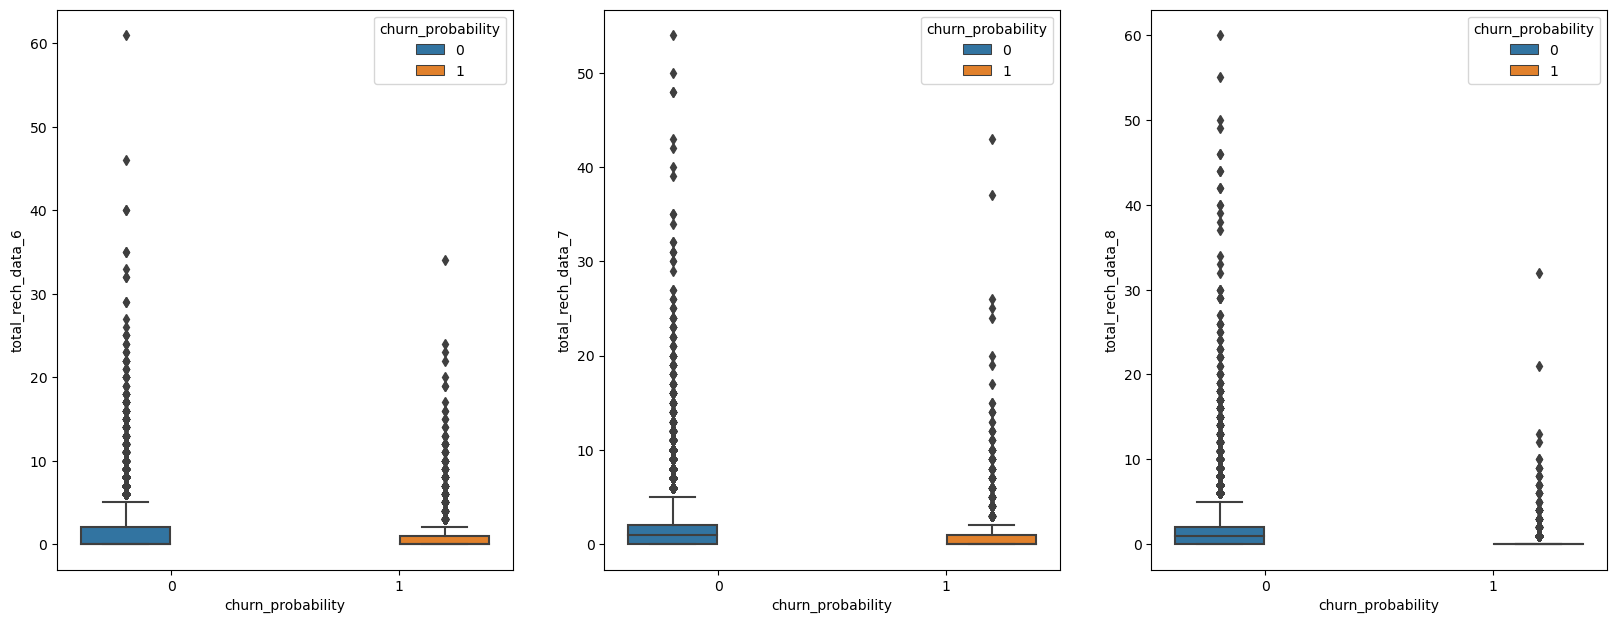

In [433]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df_train_hvc, y="total_rech_data_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df_train_hvc, y="total_rech_data_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df_train_hvc, y="total_rech_data_8", x="churn_probability", hue="churn_probability")
plt.show()

This shows that there are lots of outliers.

So first lets remove the outliers

In [434]:
def remove_outliers(col, k=3):
    upl = col.mean() + k*col.std()
    lpl = col.mean() - k*col.std()
    col[col<lpl] = lpl
    col[col>upl] = upl
    return col

In [435]:
df = df_train_hvc

df[num_cols] = df[num_cols].apply(remove_outliers, axis=0)

<Axes: xlabel='arpu_6', ylabel='Density'>

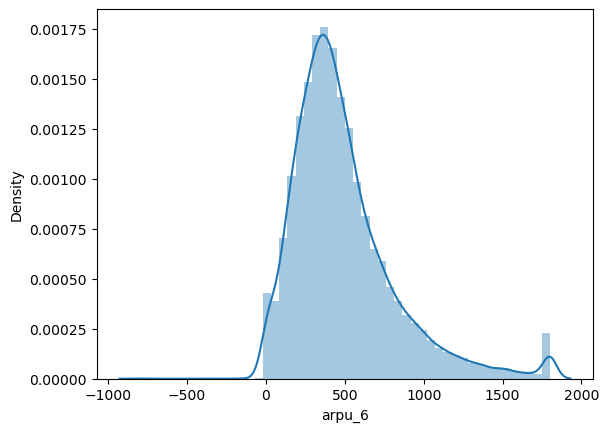

In [436]:
sns.distplot(df.arpu_6)

<Axes: xlabel='churn_probability', ylabel='count'>

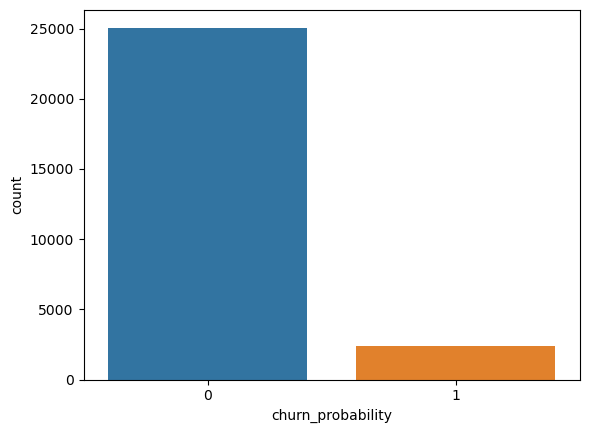

In [437]:
sns.countplot(data=df,x="churn_probability")

<Axes: xlabel='churn_probability', ylabel='aon'>

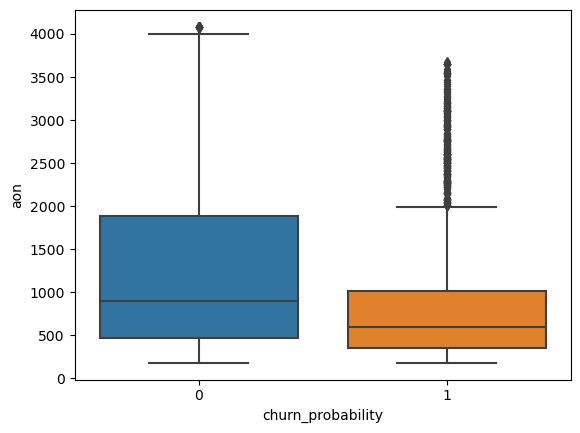

In [438]:
sns.boxplot(data=df, y="aon", x="churn_probability")

More churn happens when AON (age of network) is below 1000 i.e for less than 1000 days, churn probability is high.

<Axes: xlabel='onnet_mou_6', ylabel='Density'>

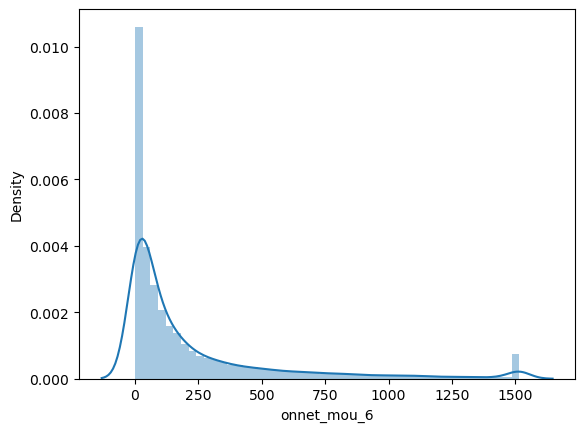

In [439]:
sns.distplot(df.onnet_mou_6)

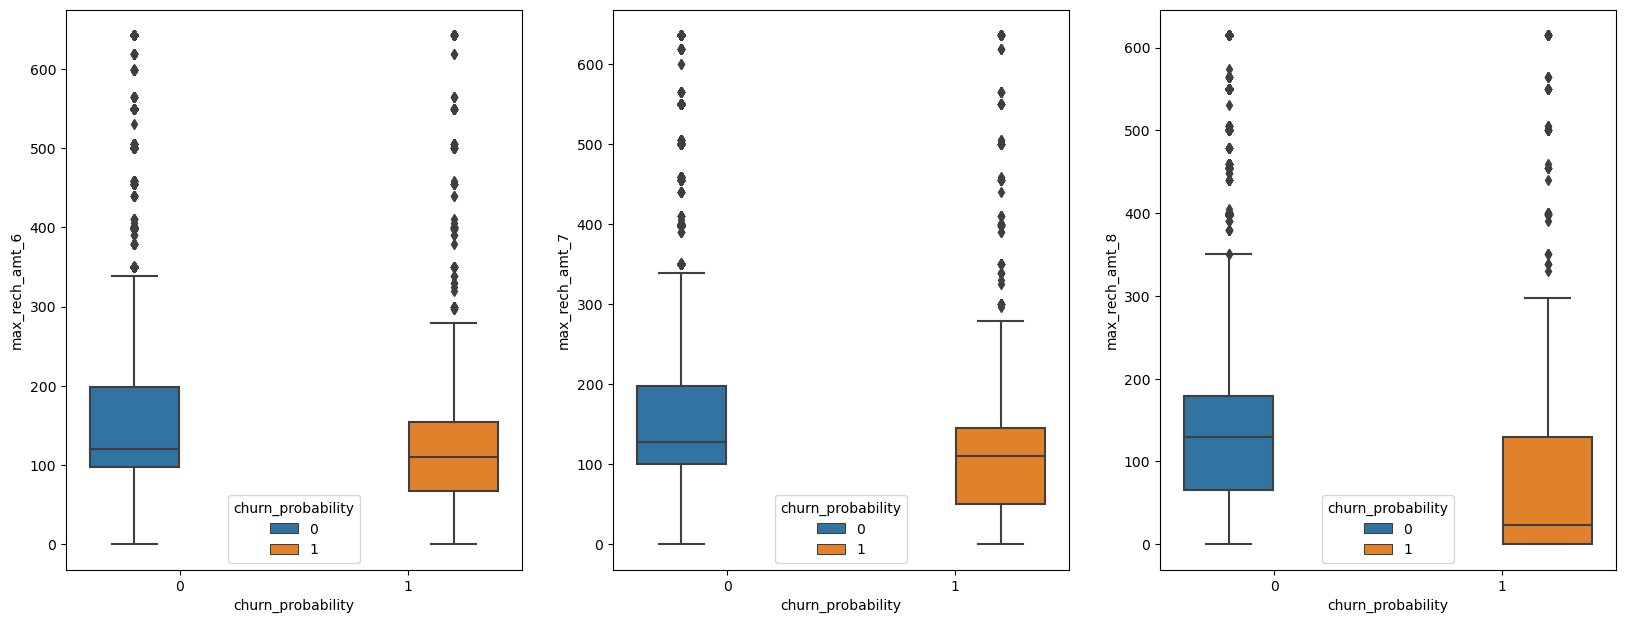

In [440]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df, y="max_rech_amt_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df, y="max_rech_amt_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df, y="max_rech_amt_8", x="churn_probability", hue="churn_probability")
plt.show()

Less recharge amount is tending towards churning.

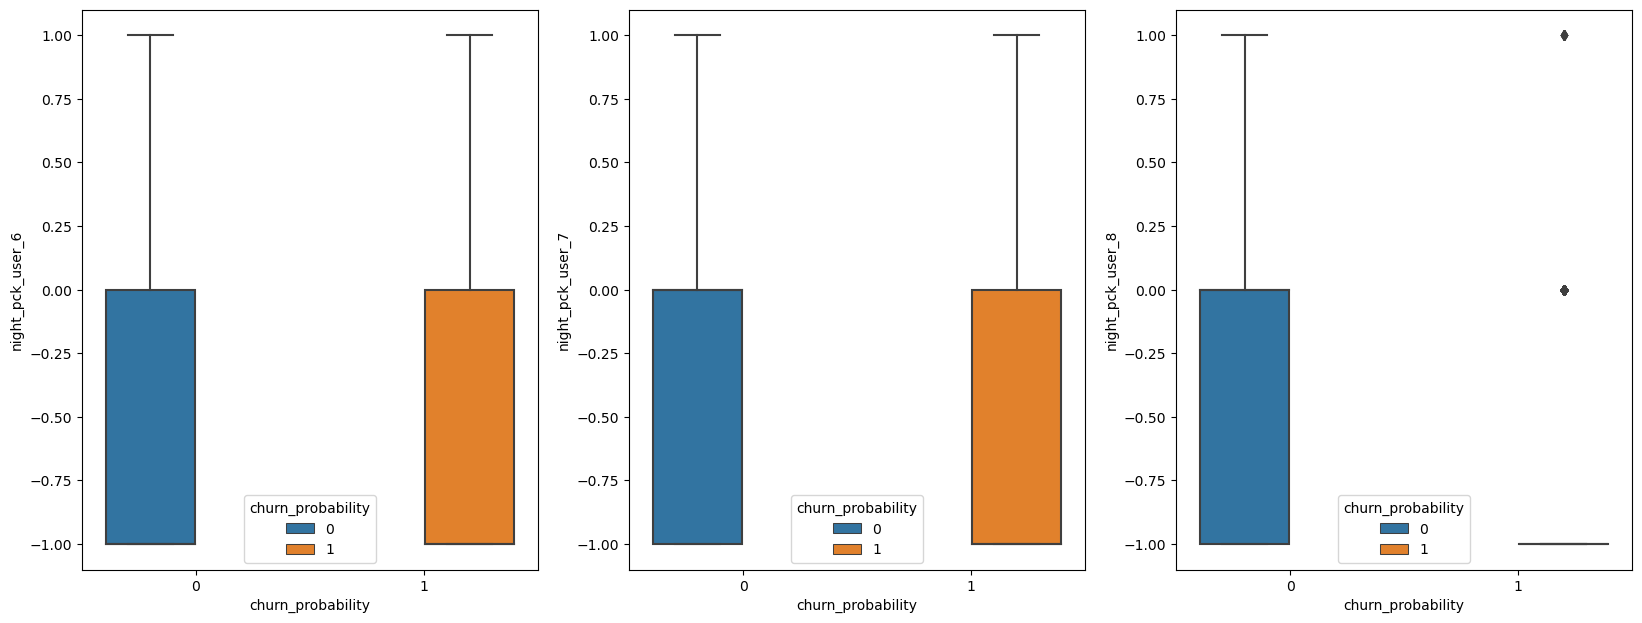

In [441]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df, y="night_pck_user_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df, y="night_pck_user_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df, y="night_pck_user_8", x="churn_probability", hue="churn_probability")
plt.show()

No direct insights from the night pack user data.

### Model Building

Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [442]:
# Putting feature variable to X
X = df.drop(['churn_probability','id'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7,avg_rech_amt_6_7
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1.0,647.0,0.00,0.00,0.00,1225.0,1337.0,852.0,1494.0,213.0
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,584.0,82.26,73.56,177.14,198.0,198.0,198.0,396.0,198.0
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,...,-1.0,322.0,0.00,0.00,0.00,0.0,0.0,0.0,469.5,469.5
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,...,1.0,602.0,0.00,0.00,0.00,154.0,0.0,154.0,604.0,527.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,...,-1.0,455.0,0.00,0.00,0.00,0.0,0.0,0.0,1205.0,1205.0


In [443]:
# Putting response variable to y
y = df['churn_probability']

y.head()

4     0
7     0
12    0
15    0
23    0
Name: churn_probability, dtype: int64

In [444]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [445]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Since we have only 8.27% data as churned one, its an imbalanced dataset and to balance that we will use SMOTE.

In [446]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [447]:
X_train_sm.shape

(35110, 150)

In [448]:
 y_train_sm.shape

(35110,)

In [449]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM( y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                35110
Model:                            GLM   Df Residuals:                    34959
Model Family:                Binomial   Df Model:                          150
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12188.
Date:                Sat, 13 Jan 2024   Deviance:                       24376.
Time:                        20:51:14   Pearson chi2:                 1.68e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4994
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.1389      0.134      8.528      0.000       0.877       1.401
arpu_6                     0.0007      0.000      3.543      0.000       0.000       0.001
arpu_7                     0.0014      0.000      6.859      0.000       0.001       0.002
arpu_8                     0.0014      0.000      6.082      0.000       0.001       0.002
onnet_mou_6                0.0011      0.000      2.643      0.008       0.000       0.002
onnet_mou_7                0.0014      0.000      2.905      0.004       0.000       0.002
onnet_mou_8               -0.0011      0.001     -2.078      0.038      -0.002   -6.18e-05
offnet_mou_6               0.0013      0.000      3.763      0.000       0.001       0.002
offnet_mou_7               0.0003      0.000      0.814      0.416      -0.000       0.001
offnet_mou_8              -0.0026      0.000     -6.230      0.000      -0.003      -0.002
roam_ic_mou_6          -1.179e-05      0.001     -0.013      0.989      -0.002       0.002
roam_ic_mou_7              0.0079      0.001      7.153      0.000       0.006       0.010
roam_ic_mou_8             -0.0038      0.001     -3.765      0.000      -0.006      -0.002
roam_og_mou_6             -0.0007      0.001     -1.178      0.239      -0.002       0.000
roam_og_mou_7             -0.0040      0.001     -5.003      0.000      -0.006      -0.002
roam_og_mou_8              0.0100      0.001     12.965      0.000       0.008       0.011
loc_og_t2t_mou_6          -0.0003      0.001     -0.308      0.758      -0.002       0.001
loc_og_t2t_mou_7           0.0025      0.001      2.245      0.025       0.000       0.005
loc_og_t2t_mou_8          -0.0100      0.001     -8.554      0.000      -0.012      -0.008
loc_og_t2m_mou_6          -0.0022      0.001     -2.586      0.010      -0.004      -0.001
loc_og_t2m_mou_7           0.0042      0.001      3.958      0.000       0.002       0.006
loc_og_t2m_mou_8          -0.0084      0.001     -8.029      0.000      -0.010      -0.006
loc_og_t2f_mou_6           0.0059      0.003      1.706      0.088      -0.001       0.013
loc_og_t2f_mou_7          -0.0035      0.004     -0.929      0.353      -0.011       0.004
loc_og_t2f_mou_8           0.0005      0.004      0.133      0.894      -0.007       0.008
loc_og_t2c_mou_6          -0.0108      0.006     -1.816      0.069      -0.022       0.001
loc_og_t2c_mou_7          -0.0038      0.006     -0.680      0.497      -0.015       0.007
loc_og_t2c_mou_8           0.0490      0.006      7.575      0.000       0.036       0.062
loc_og_mou_6               0.0010      0.001      1.142      0.253      -0.001       0.003
loc_og_mou_7              -0.0050      0.001     -4.637      0.000      -0.007      -0.003
loc_og_mou_8               0.0147      0.001     13.481      0.000       0.013  

### Feature Selection Using RFE

In [450]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

rfe = RFE(logreg,  n_features_to_select=15)            
rfe = rfe.fit(X_train_sm, y_train_sm)

In [451]:
# rfe.support_

In [452]:
print("selected columns: ",X_train_sm.columns[rfe.support_])

selected columns:  Index(['roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_data_8', 'count_rech_2g_8', 'night_pck_user_8',
       'fb_user_8'],
      dtype='object')


In [453]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 60),
 ('arpu_7', False, 61),
 ('arpu_8', False, 67),
 ('onnet_mou_6', False, 62),
 ('onnet_mou_7', False, 41),
 ('onnet_mou_8', False, 127),
 ('offnet_mou_6', False, 85),
 ('offnet_mou_7', False, 91),
 ('offnet_mou_8', False, 79),
 ('roam_ic_mou_6', False, 97),
 ('roam_ic_mou_7', False, 11),
 ('roam_ic_mou_8', False, 17),
 ('roam_og_mou_6', False, 111),
 ('roam_og_mou_7', False, 38),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 108),
 ('loc_og_t2t_mou_7', False, 68),
 ('loc_og_t2t_mou_8', False, 13),
 ('loc_og_t2m_mou_6', False, 59),
 ('loc_og_t2m_mou_7', False, 42),
 ('loc_og_t2m_mou_8', False, 12),
 ('loc_og_t2f_mou_6', False, 82),
 ('loc_og_t2f_mou_7', False, 103),
 ('loc_og_t2f_mou_8', False, 53),
 ('loc_og_t2c_mou_6', False, 123),
 ('loc_og_t2c_mou_7', False, 40),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 75),
 ('loc_og_mou_7', False, 43),
 ('loc_og_mou_8', False, 10),
 ('std_og_t2t_mou_6', False, 124),
 ('std_og_t2t_mou_7', False, 50

In [454]:
col = X_train_sm.columns[rfe.support_]

#### Assessing the model with StatsModels

In [455]:
X_train_SM=sm.add_constant(X_train_sm[col])
logm2 = sm.GLM( y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                35110
Model:                            GLM   Df Residuals:                    35094
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14480.
Date:                Sat, 13 Jan 2024   Deviance:                       28960.
Time:                        20:53:26   Pearson chi2:                 5.17e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4296
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5575      0.068      8.199      0.000       0.424       0.691
roam_og_mou_8         0.0081      0.000     26.097      0.000       0.008       0.009
loc_og_t2c_mou_8      0.0193      0.005      4.270      0.000       0.010       0.028
std_og_t2f_mou_8     -0.0471      0.006     -7.777      0.000      -0.059      -0.035
loc_ic_mou_8          0.0172      0.001     23.019      0.000       0.016       0.019
std_ic_mou_8          0.0201      0.001     24.157      0.000       0.018       0.022
total_ic_mou_8       -0.0240      0.001    -32.578      0.000      -0.025      -0.023
isd_ic_mou_8          0.0291      0.001     26.573      0.000       0.027       0.031
ic_others_8           0.0299      0.006      5.008      0.000       0.018       0.042
total_rech_num_6      0.0369      0.003     14.583      0.000       0.032       0.042
total_rech_num_7      0.0748      0.003     23.465      0.000       0.069       0.081
total_rech_num_8     -0.1551      0.004    -40.278      0.000      -0.163      -0.148
total_rech_data_8    -0.0038      0.027     -0.141      0.888      -0.056       0.048
count_rech_2g_8      -0.0464      0.028     -1.663      0.096      -0.101       0.008
night_pck_user_8      1.1035      0.116      9.508      0.000       0.876       1.331
fb_user_8            -1.2284      0.063    -19.400      0.000      -1.353      -1.104
=====================================================================================
"""

In [456]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred[:10]

0    0.321758
1    0.000011
2    0.855828
3    0.772348
4    0.442233
5    0.321985
6    0.089405
7    0.111547
8    0.076030
9    0.136877
dtype: float64

In [457]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([3.21758344e-01, 1.06192169e-05, 8.55827955e-01, 7.72348184e-01,
       4.42233027e-01, 3.21985183e-01, 8.94047065e-02, 1.11547060e-01,
       7.60303039e-02, 1.36877140e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [458]:
y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':y_train_sm_pred})
y_train_sm_pred_final['id'] = y_train_sm.index
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id
0,0,0.321758,0
1,0,0.000011,1
2,1,0.855828,2
3,0,0.772348,3
4,0,0.442233,4


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [459]:
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,0,0.321758,0,0
1,0,0.000011,1,0
2,1,0.855828,2,1
3,0,0.772348,3,1
4,0,0.442233,4,0


In [460]:
# Confusion matrix 

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted )
print(confusion)

[[14413  3142]
 [ 2849 14706]]


In [461]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted))

0.829364853318143


Accuracy is ~82%

#### Checking VIFs

In [462]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [463]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_ic_mou_8,17.51
3,loc_ic_mou_8,13.24
13,night_pck_user_8,11.29
11,total_rech_data_8,10.17
14,fb_user_8,8.24
12,count_rech_2g_8,7.95
9,total_rech_num_7,6.28
8,total_rech_num_6,4.64
10,total_rech_num_8,4.64
4,std_ic_mou_8,2.54


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.
With respect to z scores, lets delete 'total_ic_mou_8'.

In [464]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_data_8',
       'count_rech_2g_8', 'night_pck_user_8', 'fb_user_8'],
      dtype='object')

In [465]:
X_train_SM=sm.add_constant(X_train_sm[col])
logm3 = sm.GLM( y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                35110
Model:                            GLM   Df Residuals:                    35095
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15752.
Date:                Sat, 13 Jan 2024   Deviance:                       31505.
Time:                        20:53:27   Pearson chi2:                 5.64e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7501      0.067     11.250      0.000       0.619       0.881
roam_og_mou_8         0.0080      0.000     25.556      0.000       0.007       0.009
loc_og_t2c_mou_8      0.0278      0.004      6.280      0.000       0.019       0.036
std_og_t2f_mou_8     -0.0402      0.005     -7.793      0.000      -0.050      -0.030
loc_ic_mou_8         -0.0053      0.000    -42.333      0.000      -0.006      -0.005
std_ic_mou_8         -0.0046      0.000    -13.961      0.000      -0.005      -0.004
isd_ic_mou_8          0.0007      0.001      1.054      0.292      -0.001       0.002
ic_others_8          -0.0067      0.005     -1.273      0.203      -0.017       0.004
total_rech_num_6      0.0527      0.002     21.341      0.000       0.048       0.058
total_rech_num_7      0.0695      0.003     22.186      0.000       0.063       0.076
total_rech_num_8     -0.1994      0.004    -51.768      0.000      -0.207      -0.192
total_rech_data_8     0.0865      0.025      3.413      0.001       0.037       0.136
count_rech_2g_8      -0.1191      0.027     -4.453      0.000      -0.172      -0.067
night_pck_user_8      0.9682      0.115      8.409      0.000       0.743       1.194
fb_user_8            -1.2669      0.062    -20.284      0.000      -1.389      -1.144
=====================================================================================
"""

In [466]:
y_train_sm_pred = res.predict(X_train_SM).values.reshape(-1)
y_train_sm_pred[:10]

array([0.44780545, 0.00141717, 0.87851045, 0.82588138, 0.51572156,
       0.40284309, 0.12250046, 0.11062284, 0.12203707, 0.0740209 ])

In [467]:
y_train_sm_pred_final['Churn_Prob'] = y_train_sm_pred

In [468]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,0,0.447805,0,0
1,0,0.001417,1,0
2,1,0.878510,2,1
3,0,0.825881,3,1
4,0,0.515722,4,1


In [469]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted))

0.8062660210766164


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [470]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,night_pck_user_8,11.23
10,total_rech_data_8,10.16
13,fb_user_8,8.24
11,count_rech_2g_8,7.95
8,total_rech_num_7,6.28
7,total_rech_num_6,4.59
9,total_rech_num_8,4.53
3,loc_ic_mou_8,1.71
4,std_ic_mou_8,1.36
0,roam_og_mou_8,1.18


With respect to z scores, lets delete 'night_pck_user_8'.

In [471]:
col = col.drop('night_pck_user_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_data_8',
       'count_rech_2g_8', 'fb_user_8'],
      dtype='object')

In [472]:
X_train_SM=sm.add_constant(X_train_sm[col])
logm4 = sm.GLM( y_train_sm, X_train_SM, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                35110
Model:                            GLM   Df Residuals:                    35096
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15787.
Date:                Sat, 13 Jan 2024   Deviance:                       31574.
Time:                        20:53:28   Pearson chi2:                 5.55e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2692      0.034      8.017      0.000       0.203       0.335
roam_og_mou_8         0.0081      0.000     25.985      0.000       0.008       0.009
loc_og_t2c_mou_8      0.0294      0.004      6.654      0.000       0.021       0.038
std_og_t2f_mou_8     -0.0406      0.005     -7.848      0.000      -0.051      -0.030
loc_ic_mou_8         -0.0053      0.000    -42.354      0.000      -0.006      -0.005
std_ic_mou_8         -0.0045      0.000    -13.818      0.000      -0.005      -0.004
isd_ic_mou_8          0.0006      0.001      0.939      0.348      -0.001       0.002
ic_others_8          -0.0068      0.005     -1.293      0.196      -0.017       0.004
total_rech_num_6      0.0532      0.002     21.542      0.000       0.048       0.058
total_rech_num_7      0.0694      0.003     22.194      0.000       0.063       0.076
total_rech_num_8     -0.1985      0.004    -51.657      0.000      -0.206      -0.191
total_rech_data_8     0.0946      0.025      3.727      0.000       0.045       0.144
count_rech_2g_8      -0.1032      0.027     -3.865      0.000      -0.156      -0.051
fb_user_8            -0.7808      0.024    -32.612      0.000      -0.828      -0.734
=====================================================================================
"""

In [473]:
y_train_sm_pred = res.predict(X_train_SM).values.reshape(-1)
y_train_sm_pred[:10]

array([0.45048225, 0.00147921, 0.87984068, 0.8282602 , 0.51904505,
       0.41377536, 0.14010649, 0.13383246, 0.12347993, 0.07779881])

In [474]:
y_train_sm_pred_final['Churn_Prob'] = y_train_sm_pred

In [475]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['predicted'] = y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,0,0.450482,0,0
1,0,0.001479,1,0
2,1,0.879841,2,1
3,0,0.828260,3,1
4,0,0.519045,4,1


In [476]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted))

0.8059242381088009


So overall the accuracy is same.

##### Let's check the VIFs again

In [477]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_rech_data_8,9.69
11,count_rech_2g_8,7.85
8,total_rech_num_7,6.05
9,total_rech_num_8,4.48
7,total_rech_num_6,4.14
12,fb_user_8,2.07
3,loc_ic_mou_8,1.56
4,std_ic_mou_8,1.35
5,isd_ic_mou_8,1.17
1,loc_og_t2c_mou_8,1.16


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [478]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted )
confusion

array([[13803,  3752],
       [ 3062, 14493]], dtype=int64)

In [479]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.predicted)

0.8059242381088009

#### Metrics beyond simply accuracy

In [480]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [481]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8255767587581886

In [482]:
# Let us calculate specificity
TN / float(TN+FP)

0.7862717174594133

In [483]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21372828254058673


In [484]:
# positive predictive value 
print (TP / float(TP+FP))

0.7943546177034804


In [485]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8184405573673288


### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [486]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [487]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_Prob, drop_intermediate = False )

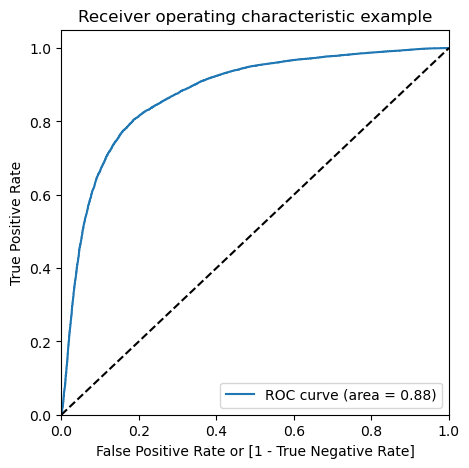

In [488]:
draw_roc(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_Prob)

####  Finding Optimal Cutoff Point¶

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [489]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.450482,0,0,1,1,1,1,1,0,0,0,0,0
1,0,0.001479,1,0,1,0,0,0,0,0,0,0,0,0
2,1,0.879841,2,1,1,1,1,1,1,1,1,1,1,0
3,0,0.828260,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.519045,4,1,1,1,1,1,1,1,0,0,0,0


In [490]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.645657  0.977044  0.314269
0.2   0.2  0.716406  0.955625  0.477186
0.3   0.3  0.764170  0.921675  0.606665
0.4   0.4  0.791028  0.870806  0.711250
0.5   0.5  0.805924  0.825577  0.786272
0.6   0.6  0.806266  0.765993  0.846539
0.7   0.7  0.781031  0.659356  0.902706
0.8   0.8  0.711678  0.473825  0.949530
0.9   0.9  0.582113  0.181886  0.982341


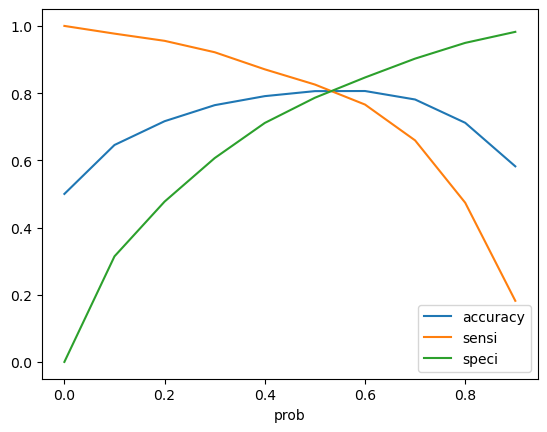

In [491]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [492]:
y_train_sm_pred_final['final_predicted'] = y_train_sm_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,Churn,Churn_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.450482,0,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.001479,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.879841,2,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.828260,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.519045,4,1,1,1,1,1,1,1,0,0,0,0,1


In [493]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.final_predicted)

0.8059242381088009

Since we had already taken 0.5 as the cut off value, confusion matrix will remain same.

### Precision and Recall

##### Precision
TP / TP + FP

In [494]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7943546177034804

##### Recall
TP / TP + FN

In [495]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8255767587581886

### Making predictions on the test set

In [496]:
X_test = X_test[col]
X_test.head()

,roam_og_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_data_8,count_rech_2g_8,fb_user_8
23078,0.0,0.0,0.0,144.14,22.74,0.0,0.0,20.000000,16.000000,28.000000,9.68459,8.048594,1.0
68416,0.0,0.0,0.0,100.13,155.24,0.0,0.0,37.685098,37.852971,36.148777,0.00000,0.000000,-1.0
16845,0.0,0.0,0.0,156.56,2.39,0.0,0.0,14.000000,23.000000,24.000000,1.00000,1.000000,0.0
29110,0.0,0.0,0.0,138.43,17.59,0.0,0.0,13.000000,21.000000,7.000000,0.00000,0.000000,-1.0
40215,0.0,0.0,0.0,21.96,0.00,0.0,0.0,32.000000,16.000000,10.000000,6.00000,0.000000,1.0


In [497]:
X_test_sm = sm.add_constant(X_test)

In [498]:
y_test_pred = res.predict(X_test_sm)

In [499]:
y_test_pred[:10]

23078    0.009188
68416    0.061096
16845    0.047131
29110    0.729563
40215    0.682554
5993     0.477661
57388    0.292552
25060    0.847884
68697    0.463631
32867    0.073955
dtype: float64

In [500]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [501]:
# Let's see the head
y_pred_1.head()

,0
23078,0.009188
68416,0.061096
16845,0.047131
29110,0.729563
40215,0.682554


In [502]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [503]:
# Putting CustID to index
y_test_df['id'] = y_test_df.index


In [504]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [505]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [506]:
y_pred_final.head()

,churn_probability,id,0
0,0,23078,0.009188
1,0,68416,0.061096
2,0,16845,0.047131
3,0,29110,0.729563
4,0,40215,0.682554


In [507]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob', 'churn_probability':'Churn'})

In [508]:
# Rearranging the columns
y_pred_final = y_pred_final[['id','Churn','Churn_Prob']]

In [509]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,Churn,Churn_Prob
0,23078,0,0.009188
1,68416,0,0.061096
2,16845,0,0.047131
3,29110,0,0.729563
4,40215,0,0.682554


In [510]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [511]:
y_pred_final.head()

,id,Churn,Churn_Prob,final_predicted
0,23078,0,0.009188,0
1,68416,0,0.061096,0
2,16845,0,0.047131,0
3,29110,0,0.729563,1
4,40215,0,0.682554,1


In [512]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7815156667476317

In [513]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[5875, 1637],
       [ 162,  560]], dtype=int64)

In [514]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [515]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.775623268698061

In [516]:
# Let us calculate specificity
TN / float(TN+FP)

0.7820820021299254

### Using Decision Trees

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [518]:
X_train.shape, X_test.shape

((19211, 150), (8234, 150))

In [519]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [520]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [521]:
dt_base.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [522]:
y_train_pred = dt_base.predict(X_train_sm)
y_test_pred = dt_base.predict(X_test)

In [523]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [524]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7512
           1       0.37      0.72      0.49       722

    accuracy                           0.87      8234
   macro avg       0.67      0.80      0.71      8234
weighted avg       0.92      0.87      0.89      8234



#### Plot the ROC curve

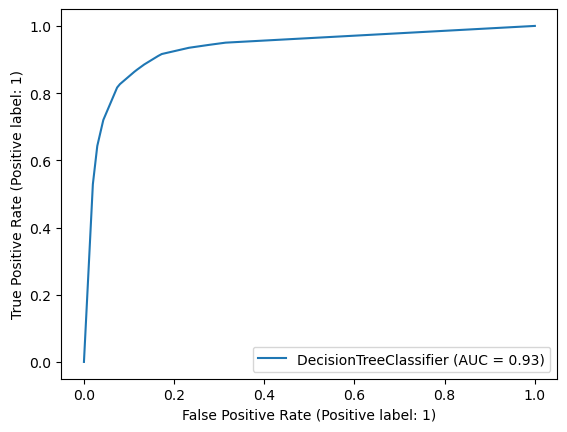

In [525]:
RocCurveDisplay.from_estimator(dt_base, X_train_sm, y_train_sm, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [526]:
dt = DecisionTreeClassifier(random_state=42)

In [527]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [528]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [529]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 1.14 s
Wall time: 46.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [530]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 5.42 s
Wall time: 1min 39s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [531]:
grid_search.best_score_

0.9157795819990072

In [532]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

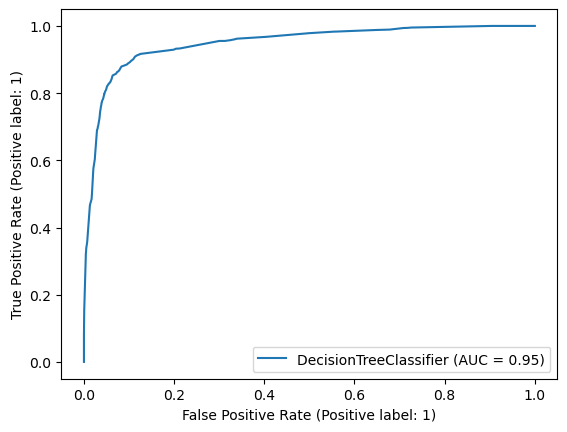

In [533]:
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

### Using Random Forest

In [534]:
from sklearn.ensemble import RandomForestClassifier

In [535]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [536]:
%%time
rf.fit(X_train_sm, y_train_sm)

CPU times: total: 922 ms
Wall time: 1.28 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [537]:
rf.oob_score_

0.82959270863002

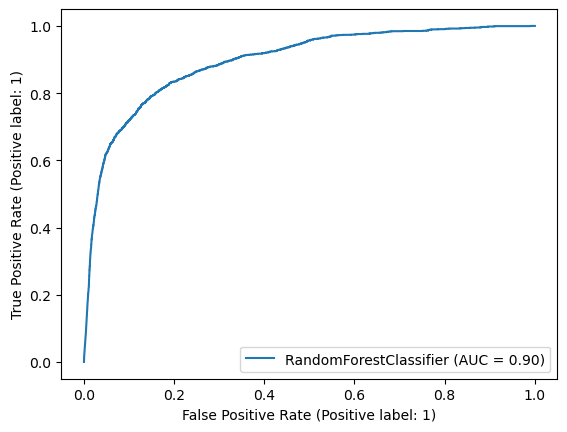

In [538]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [539]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [540]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [541]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [542]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 4min
Wall time: 24min 24s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [543]:
grid_search.best_score_

0.9534896135228642

In [544]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

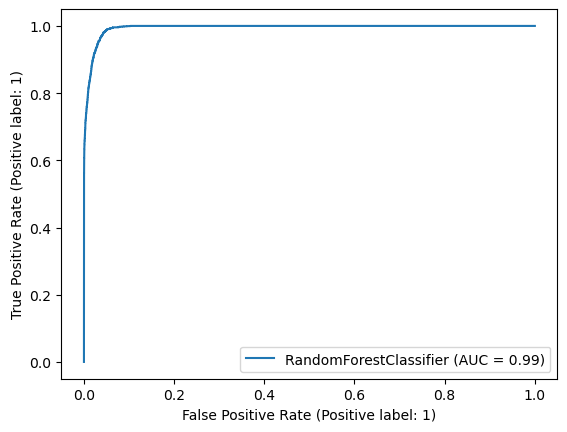

In [545]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [546]:
rf_best.feature_importances_

array([2.79863087e-03, 3.22718153e-03, 4.49425092e-02, 2.29883576e-03,
       3.28289345e-03, 4.19709133e-03, 2.22803735e-03, 2.66344856e-03,
       5.73083348e-03, 3.43497686e-03, 7.53688082e-03, 9.38920650e-02,
       1.88625058e-03, 1.27042219e-02, 8.85896978e-02, 2.53363649e-03,
       2.89420811e-03, 4.69927514e-03, 2.31153876e-03, 3.92424092e-03,
       7.74421783e-03, 1.93112070e-03, 1.83109612e-03, 1.87152852e-03,
       1.50186903e-03, 1.98420577e-03, 2.42878529e-03, 2.27070145e-03,
       3.64506968e-03, 9.96134480e-03, 3.77351400e-03, 3.40267325e-03,
       2.96445945e-03, 3.17657791e-03, 2.85303828e-03, 3.50820144e-03,
       8.36582643e-04, 7.74338478e-04, 5.16361653e-04, 3.43891615e-03,
       3.56855245e-03, 5.28931846e-03, 1.13570612e-03, 1.31713432e-03,
       1.13611168e-03, 7.23343120e-03, 6.52493749e-03, 4.61130485e-03,
       3.39827281e-03, 2.20530329e-05, 2.94311678e-05, 2.96208489e-03,
       3.42446608e-03, 3.45763908e-02, 2.19891473e-03, 2.41457709e-03,
      

In [547]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [548]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
11,roam_ic_mou_8,0.093892
14,roam_og_mou_8,0.088590
80,total_ic_mou_8,0.077975
95,total_rech_amt_8,0.055239
2,arpu_8,0.044943
101,last_day_rch_amt_8,0.039807
53,total_og_mou_8,0.034576
125,night_pck_user_8,0.030069
98,max_rech_amt_8,0.028619
140,fb_user_8,0.024419


##  PCA model

In [549]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)

In [550]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X1_train, y1_train)

In [551]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()

In [552]:
#Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [553]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7,avg_rech_amt_6_7
0,425.463,296.546,275.808,97.54,82.79,100.48,425.39,253.34,198.03,0.0,...,-1.0,1292.0,0.00,0.00,0.00,0.0,0.0,0.0,410.0,410.0
1,597.884,234.305,466.703,11.03,2.33,19.44,162.44,74.66,152.33,0.0,...,1.0,236.0,367.56,49.48,757.62,252.0,0.0,198.0,617.0,491.0
2,500.024,757.245,112.254,17.96,41.38,6.35,507.53,1234.44,164.03,0.0,...,-1.0,573.0,0.00,0.00,0.00,100.0,2097.0,0.0,1797.5,699.0
3,563.935,299.000,207.581,52.36,24.74,3.54,862.83,370.94,316.28,0.0,...,-1.0,788.0,0.00,177.17,0.00,0.0,1194.0,0.0,1083.5,486.5
4,550.395,226.320,367.414,21.86,6.23,9.59,1089.61,361.43,675.06,0.0,...,-1.0,777.0,0.00,0.00,0.00,0.0,0.0,0.0,428.0,428.0


In [554]:
pca = PCA(random_state=42)
pca.fit(X_train_sm)

PCA(random_state=42)

In [555]:
pca.components_


array([[ 1.13668780e-01,  1.22302116e-01,  8.61105101e-02, ...,
        -1.47864416e-01, -9.33695430e-02,  1.41348181e-01],
       [ 1.07914977e-01,  1.52624267e-01,  1.54584598e-01, ...,
         2.73246532e-01,  5.01538603e-01,  1.52274171e-01],
       [-5.63784532e-03,  6.05057695e-02,  1.38448643e-01, ...,
        -3.67165225e-02, -1.20526236e-01,  3.50843303e-02],
       ...,
       [-3.94858788e-06, -2.97421517e-06, -4.41725403e-06, ...,
        -1.82597998e-06, -3.36185798e-06,  3.69260082e-06],
       [ 7.25817708e-06, -3.35732403e-06, -4.87232476e-06, ...,
         4.24125185e-06,  5.56873443e-06,  1.19485866e-06],
       [ 6.28289827e-06, -2.17043354e-06,  4.60424279e-06, ...,
        -4.19305984e-06,  4.81908602e-06, -1.92093816e-06]])

In [556]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.25130148 0.44026122 0.55489159 0.62148169 0.67797197 0.72577838
 0.77063836 0.8087838  0.84007074 0.86445481 0.88742224 0.90066194
 0.91184114 0.92033275 0.92858132 0.93592233 0.9430102  0.94888101
 0.95377471 0.95847177 0.96248932 0.9659346  0.96846058 0.97084257
 0.97300666 0.97503001 0.97690286 0.9787382  0.98033352 0.98173315
 0.98304706 0.98423575 0.98533921 0.98640772 0.98743678 0.9883678
 0.98924608 0.99005987 0.99080361 0.99142615 0.99199104 0.99250143
 0.99300239 0.99347686 0.99391518 0.99434277 0.99475344 0.99514643
 0.99549337 0.99582481 0.99614558 0.99644177 0.99671667 0.99696892
 0.99720618 0.99743696 0.99764713 0.99782836 0.99799697 0.99815839
 0.99830907 0.99844635 0.99857623 0.99869069 0.99879762 0.99888971
 0.99897687 0.99905956 0.99913856 0.99920913 0.99927689 0.99933725
 0.99938722 0.99943569 0.9994829  0.99952421 0.99956485 0.99960506
 0.99964101 0.99967492 0.99970473 0.99973374 0.99975967 0.99978298
 0.99980421 0.99982504 0.99984287 0.99985992 0.99987657 0.99989

Text(0, 0.5, 'Cumulative Variance')

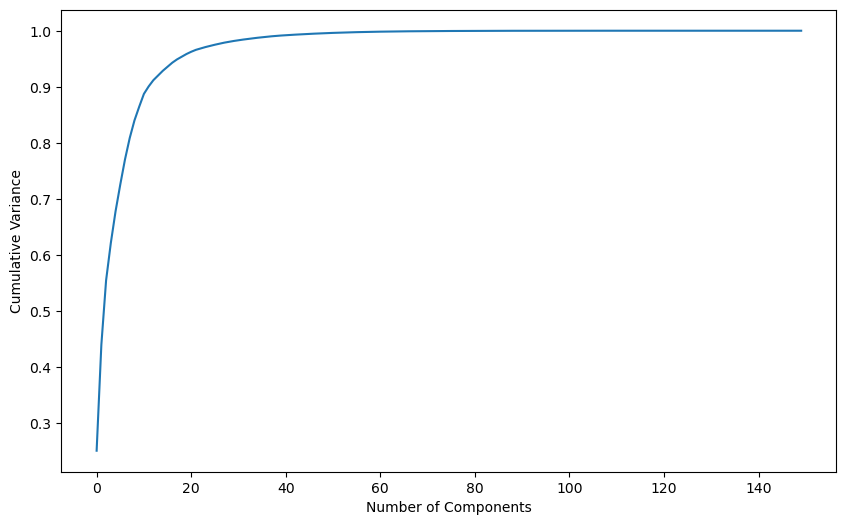

In [557]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [558]:
# Start PCA with 70
pca_final = IncrementalPCA(n_components=70)

In [559]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [560]:
X_test_pca = pca_final.transform(X_test)

In [561]:

# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [562]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [563]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [564]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.065136,0.300413,0.028311,0.003450,0.01,{'C': 0.01},0.861605,0.862218,0.865646,0.873985,...,0.865351,0.004532,5,0.866761,0.867310,0.867755,0.863058,0.867340,0.866445,0.001723
1,1.610105,0.082897,0.026047,0.001891,0.1,{'C': 0.1},0.861605,0.861930,0.866497,0.874265,...,0.865348,0.004795,6,0.866335,0.867026,0.868040,0.863272,0.866771,0.866289,0.001609
2,1.568282,0.265920,0.024012,0.005872,1,{'C': 1},0.861891,0.862507,0.866213,0.874265,...,0.865578,0.004593,4,0.866833,0.867381,0.867898,0.863058,0.867340,0.866502,0.001755
3,2.024332,0.136553,0.022758,0.005424,10,{'C': 10},0.862464,0.862218,0.866497,0.874265,...,0.865692,0.004556,3,0.866904,0.867523,0.868183,0.863201,0.866913,0.866545,0.001737
4,1.788006,0.114945,0.026199,0.006940,100,{'C': 100},0.862464,0.862507,0.866497,0.874265,...,0.865749,0.004514,1,0.866761,0.867594,0.867898,0.862843,0.866629,0.866345,0.001816
5,1.422273,0.082472,0.026516,0.006386,1000,{'C': 1000},0.862464,0.862507,0.866497,0.874265,...,0.865749,0.004514,1,0.866690,0.867665,0.867755,0.862986,0.866700,0.866359,0.001747


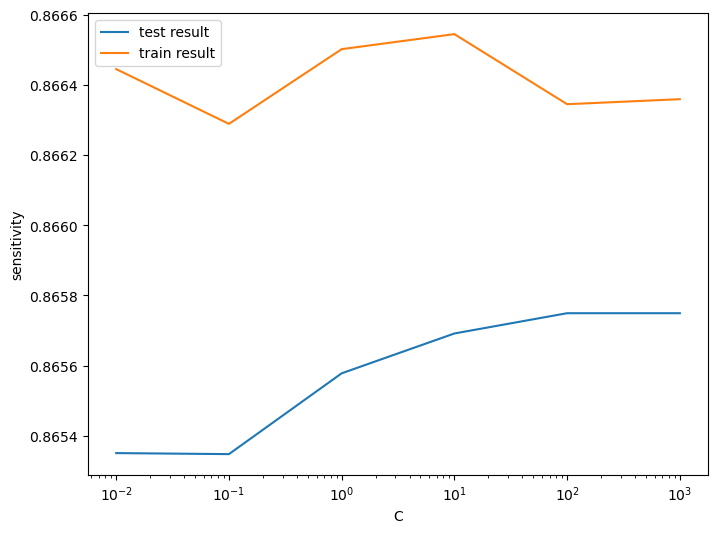

In [565]:
# plot of C versus train and validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [566]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8657493227398968 at C = 100


In [567]:
# Fit the model on the train set
logistic_pca = LogisticRegression(C=best_C)
log_pca_model = logistic_pca.fit(X_train_pca, y_train_sm)

In [568]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [569]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm, y_train_pred)
print(confusion)

[[14341  3214]
 [ 2344 15211]]


In [570]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [571]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_sm, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

Accuracy: 0.8416975220734834
Sensitivity: 0.8664767872401026


In [572]:
# Predictions on the train set
y_test_pred = log_pca_model.predict(X_test_pca)

In [573]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6151 1361]
 [ 119  603]]


In [574]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [575]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

Accuracy: 0.8202574690308477
Sensitivity: 0.8351800554016621


## Model Summary
train

Accuracy: 0.8416975220734834

Sensitivity: 0.8664767872401026

test 

Accuracy: 0.8202574690308477

Sensitivity: 0.8351800554016621

----------------------------------------------------

# Adaboost Model

In [576]:
from sklearn.ensemble import AdaBoostClassifier

In [577]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7632985183385961

In [578]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

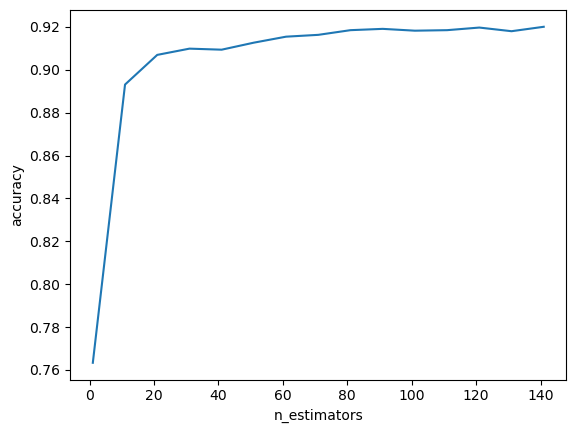

In [579]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [580]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7512
           1       0.31      0.84      0.45       722

    accuracy                           0.82      8234
   macro avg       0.64      0.83      0.67      8234
weighted avg       0.92      0.82      0.85      8234



#### Prediction on train set

In [581]:
# Predictions on the train set
y_train_pred = adaboost_best.predict(X_train)

In [582]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17202   353]
 [  476 17079]]


In [583]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [584]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9763884933067503
Sensitivity:- 0.972885217886642
Specificity:- 0.9798917687268585


#### Prediction on test set

In [585]:
# Prediction on the test set
y_test_pred = adaboost_best.predict(X_test)

In [586]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7190  322]
 [ 332  390]]


In [587]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false neg

In [588]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# SpecificityPCA
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9205732329366043
Sensitivity:- 0.5401662049861495
Specificity:- 0.9571352502662407


***Model summary***

- Train set
    - Accuracy = 0.9763884933067503
    - Sensitivity = 0.972885217886642
    - Specificity = 0.9798917687268585
- Test set
    - Accuracy = 0.9205
    - Sensitivity = 0.5401662049861495
    - Specificity = 0.9571352502662407

## -----------------------------------------------

# Final Conclusion
####  Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the adaboost models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.
But we also noticed the resource consumption is more in these models.

####  Final conclusion with NO PCA
We can see that the logistic model with no PCA has good sensitivity and accuracy, with compare to the models with PCA. So, we can go for the more simplistic as it also reduces the chance for overfitting. 

### Final Model selection
After seeing both the models we conclude the better option to go with Logestic regression with No PCA.
As it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business

# Predictions on the test set


Checking if there is missing values

So there are many missing values. Lets first do the following and then we can check the percentage again:
- zero imputation for recharge columns
- removal of date columns
- deriving new columns
- imputing categorical variables
- deleting columns with more that 70% missing values
- dropping columns with same value in all rows
- imputing rows with missing values

##### zero imputation for recharge columns

##### removal of date columns

##### deriving new columns

##### imputing categorical variables

##### deleting columns with more that 70% missing values

##### dropping columns with same value in all rows

Alright, now we have a clean dataset.
<br>
Lets start with the predictions on the test set.

In [608]:
df_test = pd.read_csv("test.csv")

In [609]:
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [610]:
# Converting y_pred to a dataframe which is an array
y_pred_ac_1 = pd.DataFrame(y_test_ac_pred)

In [611]:
# Let's see the head
y_pred_ac_1.head()

,0
0,0.748324
1,0.442608
2,0.809648
3,0.133042
4,0.568684


In [603]:
y_test_df = df_test['id']

In [604]:
# Removing index for both dataframes to append them side by side 
y_pred_ac_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_ac_1],axis=1)

y_pred_final.head()

,id,0
0,69999,0.748324
1,70000,0.442608
2,70001,0.809648
3,70002,0.133042
4,70003,0.568684


In [605]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_probability'})

y_pred_final.head()

,id,churn_probability
0,69999,0.748324
1,70000,0.442608
2,70001,0.809648
3,70002,0.133042
4,70003,0.568684


In [606]:
y_pred_final['churn_probability'] = y_pred_final.churn_probability.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,1


In [607]:
y_pred_final.to_csv('submission_jayshree_manisha.csv',index=False)

In [ ]:
# reasoning why we are doing RFE

In [ ]:
X_test_ac = df_test[col]
X_test_ac.head()

In [ ]:
import statsmodels.api as sm
X_test_ac = sm.add_constant(X_test_ac)

# try with adaboost

In [ ]:
y_test_ac_pred = res.predict(X_test_ac)

In [ ]:
y_test_ac_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_ac_1 = pd.DataFrame(y_test_ac_pred)

In [ ]:
# Let's see the head
y_pred_ac_1.head()

In [ ]:
y_test_df = df_test['id']

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_ac_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_ac_1],axis=1)

y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_probability'})

y_pred_final.head()

In [ ]:
y_pred_final['churn_probability'] = y_pred_final.churn_probability.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

In [ ]:
y_pred_final.to_csv('submission_jayshree_manisha.csv',index=False)

 ## Important predictor variable using VIF
 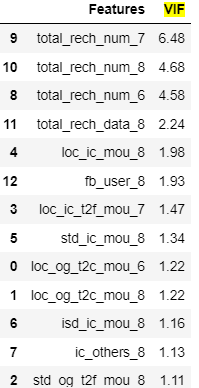

The major components for churn customers be:
1. MOU is one of the major factors, but data especially VBC if the user is not using a data pack.
2. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
3. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 

In [620]:
df_test = pd.read_csv("test.csv")

In [621]:
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [622]:
submission_data = df_test.set_index('id')
submission_data.shape

(30000, 170)

In [ ]:
date_type_columns = df_test.dtypes[df_test.dtypes =='object'].index
print("Number of date_type_columns : " ,len(date_type_columns))
print("date_type_columns : ",date_type_columns)

df_test = df_test.drop(date_type_columns, axis=1)

In [623]:
df_test = df_test.drop(col_list_missing_70, axis=1)

In [624]:
datecol=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [625]:
# Dropping date columns
df_test = df_test.drop(datecol, axis=1)

In [626]:
df_test.shape

(30000, 135)

In [627]:
submission_data = df_test.set_index('id')
submission_data.shape

(30000, 134)

In [628]:
import statsmodels.api as sm
X_test_ac = sm.add_constant(X_test_ac)

In [629]:
df_test['churn_probability'] = res.predict(submission_data)
output = df_test[['id','churn_probability']]
output.head()

ValueError: shapes (30000,134) and (14,) not aligned: 134 (dim 1) != 14 (dim 0)

In [619]:
df_train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0
